In [2]:
from scipy.optimize import minimize
import numpy as np
from pmsm_tools import phi_eval_2,i_eval_2,phi_eval_3,park_1,park_2,ipark_2
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numba
import csv

In [3]:
%matplotlib widget

In [4]:
data_comsol = np.loadtxt('C:/Users/jmmau/OneDrive/Desktop/Parametrico2.csv',skiprows=1, delimiter=',')

In [5]:
data_comsol.shape

(32193, 6)

In [6]:
21*21*73

32193

In [36]:
N_id = 21
N_iq = 21
N_th = 73

I_d = np.zeros((N_id)) 
I_q = np.zeros((N_iq)) 
Theta = np.zeros((N_th)) 

I_d_grid = np.zeros((N_id,N_iq,N_th)) 
I_q_grid = np.zeros((N_id,N_iq,N_th)) 
I_a = np.zeros((N_id,N_iq,N_th))
I_b = np.zeros((N_id,N_iq,N_th))
I_c = np.zeros((N_id,N_iq,N_th))

Phi_d = np.zeros((N_id,N_iq,N_th)) 
Phi_q = np.zeros((N_id,N_iq,N_th)) 
Phi_a = np.zeros((N_id,N_iq,N_th))
Phi_b = np.zeros((N_id,N_iq,N_th))
Phi_c = np.zeros((N_id,N_iq,N_th))

idx = 0
for th_idx in range(N_th):
    
    Theta[th_idx] = np.deg2rad(data_comsol[idx,0])
    
    for id_idx in range(N_id):
        for iq_idx in range(N_iq):
            
            theta = np.deg2rad(data_comsol[idx,0])
            phi_abc = data_comsol[idx,[3,4,5]]
            

            i_a = data_comsol[idx,1]
            i_b = data_comsol[idx,2]
            i_c = -i_a-i_b
            i_abc = np.array([i_a,i_b,i_c]) 
            i_dqz = park_1(i_abc,theta)
            I_d_grid[id_idx,iq_idx,th_idx] = i_dqz[0]
            I_q_grid[id_idx,iq_idx,th_idx] = i_dqz[1]
            
            I_a[id_idx,iq_idx,th_idx] = i_a 
            I_b[id_idx,iq_idx,th_idx] = i_b 
            I_c[id_idx,iq_idx,th_idx] = i_c 
                        
            phi_dqz = park_2(phi_abc,theta*5)
            Phi_d[id_idx,iq_idx,th_idx] = phi_dqz[0]
            Phi_q[id_idx,iq_idx,th_idx] = phi_dqz[1]
            
            Phi_a[id_idx,iq_idx,th_idx] = phi_abc[0]
            Phi_b[id_idx,iq_idx,th_idx] = phi_abc[1]
            Phi_c[id_idx,iq_idx,th_idx] = phi_abc[2]
            

            
            idx += 1
            

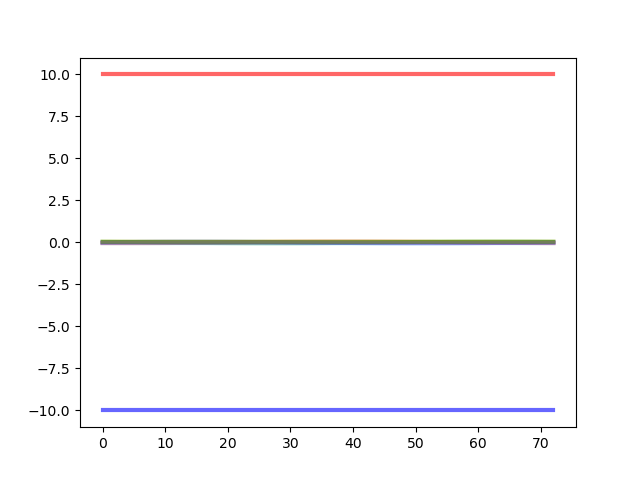

In [37]:
fig,axes = plt.subplots(nrows=1, sharex=True)

axes.plot(Phi_a[20,10,:], 'r', alpha=0.3, lw=3)
axes.plot(Phi_b[20,10,:], 'g', alpha=0.3, lw=3)
axes.plot(Phi_c[20,10,:], 'b', alpha=0.3, lw=3)

axes.plot(I_a[20,10,:], 'r', alpha=0.6, lw=3)
axes.plot(I_b[20,10,:], 'g', alpha=0.6, lw=3)
axes.plot(I_c[20,10,:], 'b', alpha=0.6, lw=3)


axes.plot(Phi_d[20,10,:], 'c', alpha=0.3, lw=3)
axes.plot(Phi_q[20,10,:], 'm', alpha=0.3, lw=3)
axes.plot((Phi_d[10,10,:]**2+Phi_q[10,10,:]**2)**0.5, 'y', alpha=0.3, lw=3)

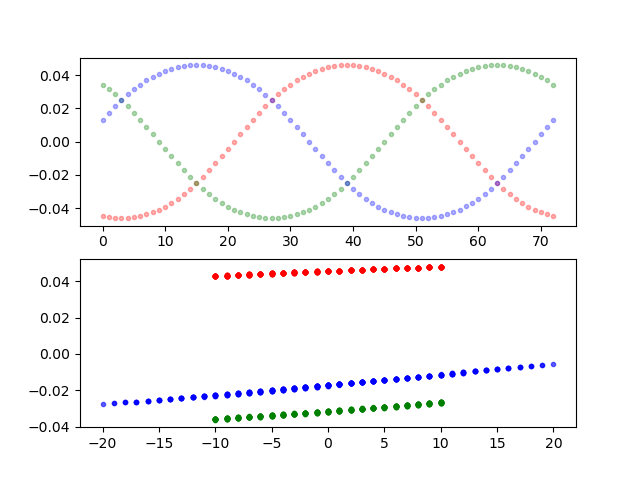

In [67]:
fig,axes = plt.subplots(nrows=2)

theta_deg = -10
ith = np.int32(theta_deg/360*72)+39
axes[0].plot(Phi_a[10,10,:], '.r', alpha=0.3, lw=3)
axes[0].plot(Phi_b[10,10,:], '.g', alpha=0.3, lw=3)
axes[0].plot(Phi_c[10,10,:], '.b', alpha=0.3, lw=3)

#axes.plot(Phi_b[20,10,0], 'g', alpha=0.3, lw=3)
#axes.plot(Phi_c[20,10,0], 'b', alpha=0.3, lw=3)

axes[1].plot(I_a[:,:,ith],Phi_a[:,:,ith],'.r', alpha=0.6, lw=3)
axes[1].plot(I_b[:,:,ith],Phi_b[:,:,ith],'.g', alpha=0.6, lw=3)
axes[1].plot(I_c[:,:,ith],Phi_c[:,:,ith],'.b', alpha=0.6, lw=3)

#axes[1].plot(I_c[:,:,0], '.b', alpha=0.6, lw=3)

#axes.plot(I_b[20,10,0], 'g', alpha=0.6, lw=3)
#axes.plot(I_c[20,10,0], 'b', alpha=0.6, lw=3)
#
#
#axes.plot(Phi_d[20,10,:], 'c', alpha=0.3, lw=3)
#axes.plot(Phi_q[20,10,:], 'm', alpha=0.3, lw=3)
#axes.plot((Phi_d[10,10,:]**2+Phi_q[10,10,:]**2)**0.5, 'y', alpha=0.3, lw=3)

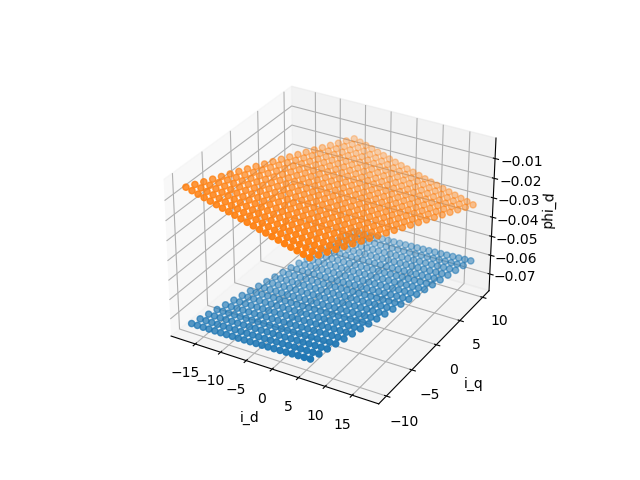

In [57]:
N = 21
I_d_arr = np.linspace(-10,10,21)
I_q_arr = np.linspace(-10,10,21)

#I_d_grid,I_q_grid = np.meshgrid(I_d_arr,I_q_arr)

th_idx = 0
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(I_q_grid[:,:,th_idx],I_d_grid[:,:,th_idx], Phi_d[:,:,th_idx]*1.5)
ax.scatter(I_q_grid[:,:,th_idx],I_d_grid[:,:,th_idx], Phi_q[:,:,th_idx]*1.5)

#ax.scatter(I_d_grid,I_q_grid, Phi_q[:,:,15])

ax.set_xlabel('i_d')
ax.set_ylabel('i_q')
ax.set_zlabel('phi_d');

ValueError: shape mismatch: objects cannot be broadcast to a single shape

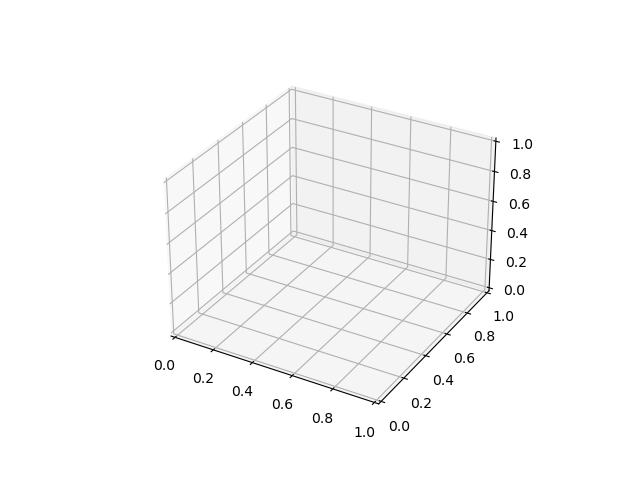

In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(I_q_grid,I_d_grid, Phi_d[:,:,15]*1.5)
ax.scatter(I_d_grid,I_q_grid, Phi_q[:,:,15]*1.5)

ax.set_xlabel('i_d')
ax.set_ylabel('i_q')
ax.set_zlabel('phi_q');

ValueError: x and y must have same first dimension, but have shapes (73,) and (32193, 3)

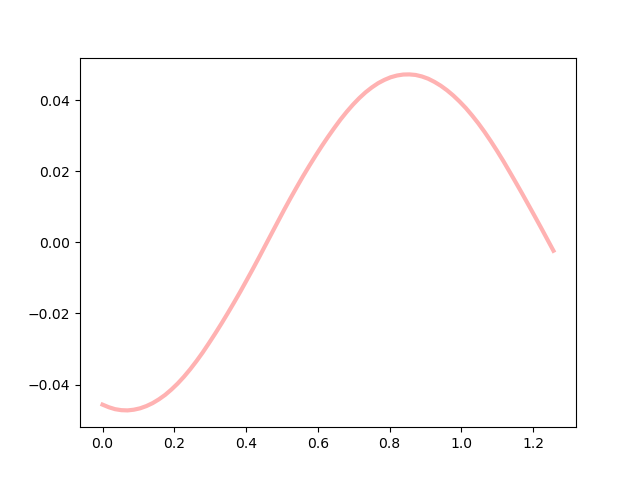

In [9]:
Phi_d_i2p = Phi_d
Phi_q_i2p = Phi_q
I_d_i2p = I_d
I_q_i2p = I_q

fig,axes = plt.subplots(nrows=1, sharex=True)

#for it in range(0,2):
it = 10
#axes.plot(I_d_i2p, Phi_d_i2p[:,it,0] , 'r', alpha=0.3, lw=3)
axes.plot(Theta, Phi_d_i2p[10,10,:] , 'r', alpha=0.3, lw=3)

axes.plot(Theta,data_comsol[:,[3,4,5]] , 'r', alpha=0.3, lw=3)

#phi_abc = data_comsol[:,[3,4,5]]
    #axes.plot(I_d_i2p, np.interp(I_d_i2p,I_d_i2p,Phi_d_i2p[:,it,0]) , 'r', alpha=it/21, lw=3)
#axes.plot(I_d_p2i[:,it,0],Phi_d_p2i, 'r')
#axes.plot(Theta_i2p,I_q_p2i[10,10,:])

#axes.plot(I_q_i2p,Phi_q_i2p[9,:,0], 'g', alpha=0.3, lw=3)
#axes.plot(I_q_p2i[9,:,0],Phi_q_p2i, 'g')

axes.grid()

In [136]:
Theta

array([0.        , 0.01745329, 0.03490659, 0.05235988, 0.06981317,
       0.08726646, 0.10471976, 0.12217305, 0.13962634, 0.15707963,
       0.17453293, 0.19198622, 0.20943951, 0.2268928 , 0.2443461 ,
       0.26179939, 0.27925268, 0.29670597, 0.31415927, 0.33161256,
       0.34906585, 0.36651914, 0.38397244, 0.40142573, 0.41887902,
       0.43633231, 0.45378561, 0.4712389 , 0.48869219, 0.50614548,
       0.52359878, 0.54105207, 0.55850536, 0.57595865, 0.59341195,
       0.61086524, 0.62831853, 0.64577182, 0.66322512, 0.68067841,
       0.6981317 , 0.71558499, 0.73303829, 0.75049158, 0.76794487,
       0.78539816, 0.80285146, 0.82030475, 0.83775804, 0.85521133,
       0.87266463, 0.89011792, 0.90757121, 0.9250245 , 0.9424778 ,
       0.95993109, 0.97738438, 0.99483767, 1.01229097, 1.02974426,
       1.04719755, 1.06465084, 1.08210414, 1.09955743, 1.11701072,
       1.13446401, 1.15191731, 1.1693706 , 1.18682389, 1.20427718,
       1.22173048, 1.23918377, 1.25663706])

In [116]:
fig,axes = plt.subplots(nrows=1, sharex=True)

axes.plot(I_q_i2p[10,:], Phi_q_i2p[10,:,0] , 'r', alpha=0.3, lw=3)

axes.grid()

array([[ 1.73205081e+01,  1.61658075e+01,  1.50111070e+01,
         1.38564065e+01,  1.27017059e+01,  1.15470054e+01,
         1.03923048e+01,  9.23760431e+00,  8.08290377e+00,
         6.92820323e+00,  5.77350269e+00,  4.61880215e+00,
         3.46410162e+00,  2.30940108e+00,  1.15470054e+00,
        -5.92118946e-16, -1.15470054e+00, -2.30940108e+00,
        -3.46410162e+00, -4.61880215e+00, -5.77350269e+00],
       [ 1.67431578e+01,  1.55884573e+01,  1.44337567e+01,
         1.32790562e+01,  1.21243557e+01,  1.09696551e+01,
         9.81495458e+00,  8.66025404e+00,  7.50555350e+00,
         6.35085296e+00,  5.19615242e+00,  4.04145188e+00,
         2.88675135e+00,  1.73205081e+00,  5.77350269e-01,
        -5.77350269e-01, -1.73205081e+00, -2.88675135e+00,
        -4.04145188e+00, -5.19615242e+00, -6.35085296e+00],
       [ 1.61658075e+01,  1.50111070e+01,  1.38564065e+01,
         1.27017059e+01,  1.15470054e+01,  1.03923048e+01,
         9.23760431e+00,  8.08290377e+00,  6.92820323e

C:\Users\jmmau\AppData\Local\Temp/ipykernel_8808/2317160295.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


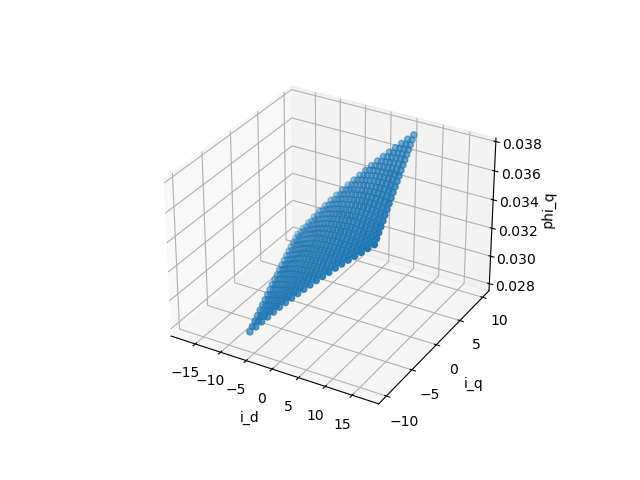

In [64]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(I_q, I_d, Phi_q[:,:,15])

ax.set_xlabel('i_d')
ax.set_ylabel('i_q')
ax.set_zlabel('phi_q');

NameError: name 'N' is not defined

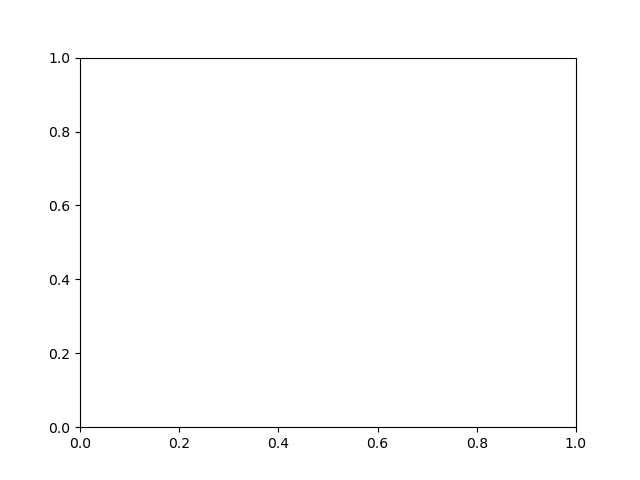

In [56]:
fig,axes = plt.subplots(nrows=1, sharex=True)

it = np.floor(N/2).astype(np.int32)
axes.plot(Theta_i2p,I_d_p2i[it,it,:])
axes.plot(Theta_i2p,I_q_p2i[it,it,:])

axes.grid()

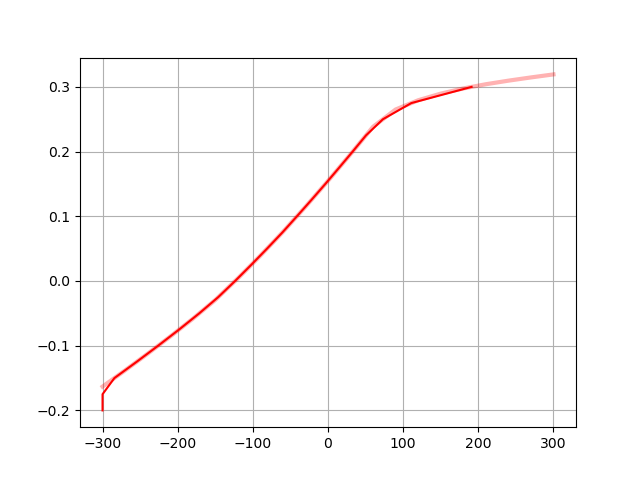

In [42]:
fig,axes = plt.subplots(nrows=1, sharex=True)

#for it in range(0,2):
it = 10
axes.plot(I_d_i2p, np.interp(I_d_i2p,I_d_i2p,Phi_d_i2p[:,it,0]) , 'r', alpha=0.3, lw=3)
    #axes.plot(I_d_i2p, np.interp(I_d_i2p,I_d_i2p,Phi_d_i2p[:,it,0]) , 'r', alpha=it/21, lw=3)
axes.plot(I_d_p2i[:,it,0],Phi_d_p2i, 'r')
#axes.plot(Theta_i2p,I_q_p2i[10,10,:])

#axes.plot(I_q_i2p,Phi_q_i2p[9,:,0], 'g', alpha=0.3, lw=3)
#axes.plot(I_q_p2i[9,:,0],Phi_q_p2i, 'g')

axes.grid()

In [29]:
#i_d, i_q -> LUT original phi_d,phi_q -> invLUT -> i_d, i_q

In [30]:
I_d_p2i[:,it,0]

array([-299.99995212, -299.99999673, -299.9999605 , -299.99994593,
       -293.13309236, -235.5033773 , -200.57881741, -172.88453622,
       -146.50783847, -120.5030337 ,  -94.07736134,  -64.04816553,
        -21.17353234,   35.21309934,   67.01930228,  110.32360207,
        147.86006551,  263.40911309,  293.27035009,  210.23502118,
        255.65537967])

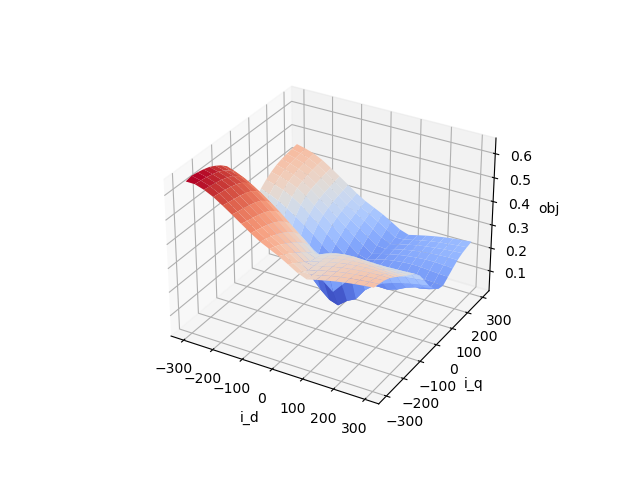

In [31]:
from matplotlib import cm

fig = plt.figure()
ax = plt.axes(projection='3d')

phi_d = 0.15
phi_q = 0.1
obj = (Phi_d_i2p[:,:,0]-phi_d)**2+(Phi_q_i2p[:,:,0]-phi_q)**2

#obj = np.abs(Phi_d_i2p[:,:,0]-phi_d)+np.abs(Phi_q_i2p[:,:,0]-phi_q)

ax.plot_surface(I_q_i2p_grid, I_d_i2p_grid,obj , cmap=cm.coolwarm)

ax.set_xlabel('i_d')
ax.set_ylabel('i_q')
ax.set_zlabel('obj');

In [32]:
np.unravel_index(np.argmin(obj),obj.shape)

(10, 11)

In [33]:
N = 11
offset = 5
I_d_p2i_grid,I_q_p2i_grid = np.meshgrid(range(N),range(N))

theta_t = 0.0

for irow in range(N):
    for icol in range(N):  
        phi_d = Phi_d_i2p[irow+offset,icol+offset,0]
        phi_q = Phi_q_i2p[irow+offset,icol+offset,0]
        i_d,i_q = i_eval_2(phi_d,phi_q,theta_t/(2*np.pi)*30,Phi_d_p2i,Phi_q_p2i,I_d_p2i,I_q_p2i,Theta_p2i)
        I_d_p2i_grid[irow,icol] = i_d
        I_q_p2i_grid[irow,icol] = i_q
        


In [185]:
i_eval_2(phi_d,phi_q,theta_t/(2*np.pi)*30,Phi_d_p2i,Phi_q_p2i,I_d_p2i,I_q_p2i,Theta_p2i)

(116.51618328305631, 141.70293762719382)

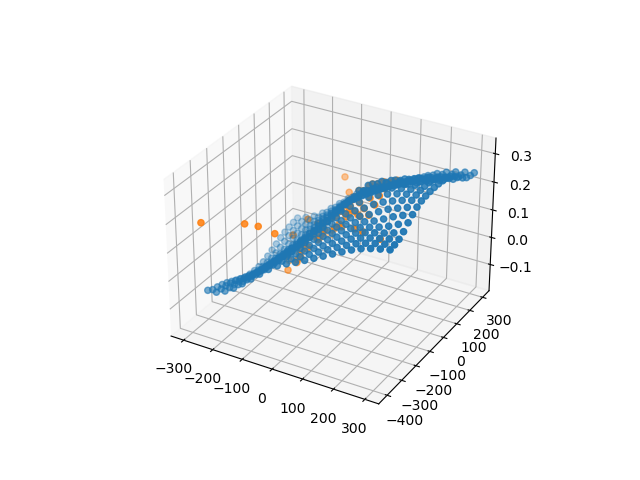

In [186]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(I_q_i2p_grid, I_d_i2p_grid, Phi_d_i2p[:,:,0])
ax.scatter(I_d_p2i_grid, I_q_p2i_grid, Phi_d_i2p[offset:(offset+N),offset:(offset+N),0])



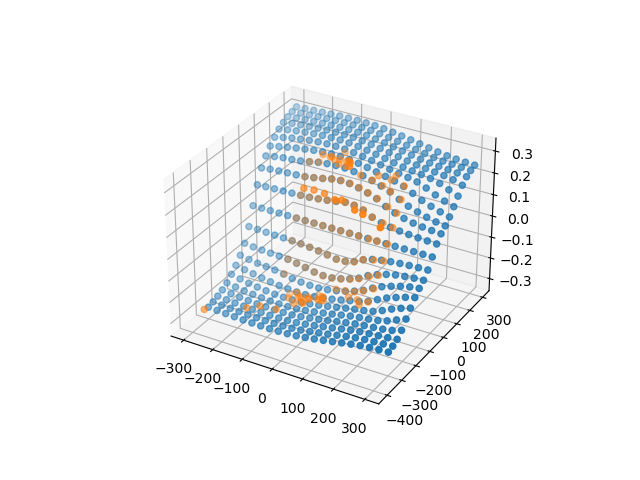

In [187]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(I_q_i2p_grid, I_d_i2p_grid, Phi_q_i2p[:,:,0])
ax.scatter(I_d_p2i_grid, I_q_p2i_grid, Phi_q_i2p[offset:(offset+N),offset:(offset+N),0])


In [122]:
Phi_d_i2p[offset:(offset+N),offset:(offset+N),0]

array([[-0.08033657, -0.08324693, -0.08733635, -0.09316227, -0.10117353,
        -0.10711332, -0.11036897, -0.1120223 , -0.11236677, -0.11138373],
       [-0.05967156, -0.06234104, -0.06580555, -0.07029233, -0.07650547,
        -0.08184127, -0.0842959 , -0.08568969, -0.08587265, -0.08493785],
       [-0.03170237, -0.03387426, -0.03671846, -0.04092545, -0.0465448 ,
        -0.05314934, -0.05699851, -0.05837139, -0.05844446, -0.05756604],
       [-0.00298741, -0.00427036, -0.00588036, -0.008393  , -0.01207499,
        -0.01890746, -0.02621216, -0.02907142, -0.02928291, -0.02829859],
       [ 0.02561049,  0.02520462,  0.02477192,  0.02416259,  0.02254906,
         0.0182293 ,  0.00999014,  0.00471896,  0.00404108,  0.00557271],
       [ 0.05335718,  0.05418213,  0.0551864 ,  0.05655114,  0.05679878,
         0.05459608,  0.04751441,  0.04097458,  0.03914774,  0.04191392],
       [ 0.07760392,  0.08028624,  0.08405302,  0.08785773,  0.09026262,
         0.09017694,  0.08659788,  0.07847676

In [121]:
I_d_p2i_grid.shape

(10, 10)

In [44]:
import scipy.io as sio
sio.savemat('pmsm_phi2i_21p.mat', {'data': data_p2i})

In [53]:
simulink = sio.loadmat('./simulink/pmsm_simulink_10ohm.mat')

In [54]:
simulink['simout']

array([[ 0.00000000e+00,  4.12023776e+00,  4.67439297e+02, ...,
        -4.12023776e-03, -5.42131228e-01,  4.38372964e-01],
       [ 1.45650326e-07,  3.90468755e+00,  4.67546735e+02, ...,
        -4.14282956e-03, -5.42129072e-01,  4.36726061e-01],
       [ 4.36950979e-07,  3.51439174e+00,  4.67736693e+02, ...,
        -4.22880767e-03, -5.42119744e-01,  4.33427496e-01],
       ...,
       [ 9.98771660e-03,  4.24767392e+02, -9.96156716e+01, ...,
         9.03759638e-03, -4.44185962e-01,  7.87931729e-01],
       [ 9.99408242e-03,  4.26443968e+02, -8.66160321e+01, ...,
         1.53015563e-02, -4.50546844e-01,  1.61134550e+00],
       [ 1.00000000e-02,  4.27721655e+02, -7.42830832e+01, ...,
         2.11092164e-02, -4.56591940e-01,  2.37710708e+00]])

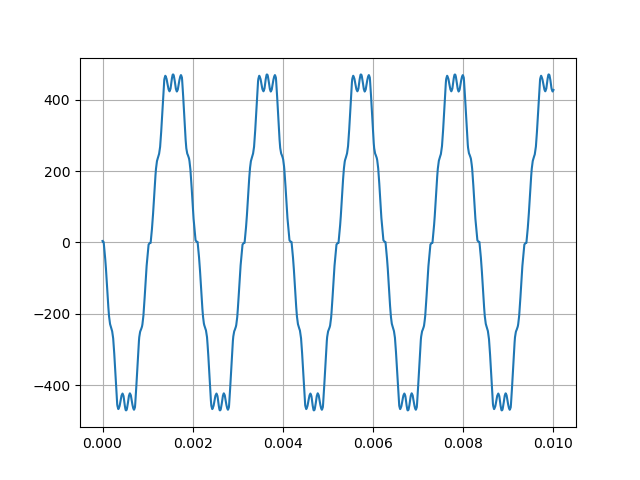

In [55]:
fig,axes = plt.subplots(nrows=1, sharex=True)

#for it in range(0,2):
it = 10
axes.plot(simulink['simout'][:,0],simulink['simout'][:,1])


axes.grid()

In [51]:
simulink['simout'].shape

(1106, 12)